file_path: /Users/konstantinos/projects/trading-bot/trading-bot/notebooks/data/backtests/data/GBPJPY._M15_2025-12-01_13:10_2026-01-22_14:59.csv
Fetching GBPJPY data from remote server at http://192.168.2.22:5000...


2026-01-22 14:59:13.324 | INFO     | src.data.csv_data_feed:__init__:44 - Loading CSV data from /Users/konstantinos/projects/trading-bot/trading-bot/notebooks/data/backtests/data/GBPJPY._M15_2025-12-01_13:10_2026-01-22_14:59.csv
2026-01-22 14:59:13.332 | INFO     | src.data.csv_data_feed:__init__:53 - Loaded 3425 rows from CSV
2026-01-22 14:59:13.333 | INFO     | src.data.csv_data_feed:__init__:54 - Date range: 2025-12-01 11:15:00 to 2026-01-22 03:15:00
2026-01-22 14:59:13.335 | INFO     | src.data.csv_data_feed:__init__:115 - Limiting data to last 300 candlesticks (from 3425 total)


symbols_list: [{'symbol': 'GBPJPY', 'csv_file': '/Users/konstantinos/projects/trading-bot/trading-bot/notebooks/data/backtests/data/GBPJPY._M15_2025-12-01_13:10_2026-01-22_14:59.csv'}]
symbols_list: [{'symbol': 'GBPJPY', 'csv_file': '/Users/konstantinos/projects/trading-bot/trading-bot/notebooks/data/backtests/data/GBPJPY._M15_2025-12-01_13:10_2026-01-22_14:59.csv'}]
Data Summary:
  GBPJPY:
    CSV File: /Users/konstantinos/projects/trading-bot/trading-bot/notebooks/data/backtests/data/GBPJPY._M15_2025-12-01_13:10_2026-01-22_14:59.csv
    Total rows: 300
    Data range: 2026-01-19 00:30:00 to 2026-01-22 03:15:00
    Price range: 210.59500 to 213.47800

Daily data feed available: GBPJPY_DAILY
2026-01-19 10:30: PENDING  BUY(41) [GBPJPY] Entry: 211.6340100, Size: 8847, TP: 211.8600500, SL: 211.5009900, Risk: 1000.0000000 Cash: 100000
2026-01-19 17:00: CANCELLED  BUY(67) [GBPJPY] Invalidated BUY trade dcb65006-a244-414c-b67b-c95aaf5acc19 due to new support 211.7939900 Cash: 100000
2026-01-

Daily RSI extraction failed or returned no data


2026-01-22 01:45: CANCELLED  BUY(294) [GBPJPY] Invalidated BUY trade 5b2df765-3b61-4182-8aeb-da4351507c92 due to new support 212.4749900 Cash: 97969
BACKTEST RESULTS
Initial Cash: 100000.00
Final Equity: 97969.72
PnL: -2030.28
PnL%: -2.03%
TPs/SLs: 1/3

STATISTICAL METRICS
Total Trades: 4
Win Rate: 25.00%
Average Win: $1973.20
Average Loss: $1109.44
Profit Factor: 0.59
Max Win: $1973.20 (Candle 150)
Max Loss: $-1159.07 (Candle 106)
Max Drawdown: 2.28% ($2275.29)
Sharpe Ratio: 0.00

EXECUTION COSTS
Avg Entry Slippage: 0.00000 (0.00 pips)
Avg Close Slippage: 0.00000 (0.00 pips)
Total Slippage Cost: $0.00
Trades verified: True
2026-01-22 03:15: Exporting 4 completed trades to CSV
2026-01-22 03:15: Trades exported to: /Users/konstantinos/projects/trading-bot/trading-bot/notebooks/data/backtests/results/GBPJPY._M15_2025-12-01_13:10_2026-01-22_14:59.csv
Trades exported to: /Users/konstantinos/projects/trading-bot/trading-bot/notebooks/data/backtests/results/GBPJPY._M15_2025-12-01_13:10_2026-

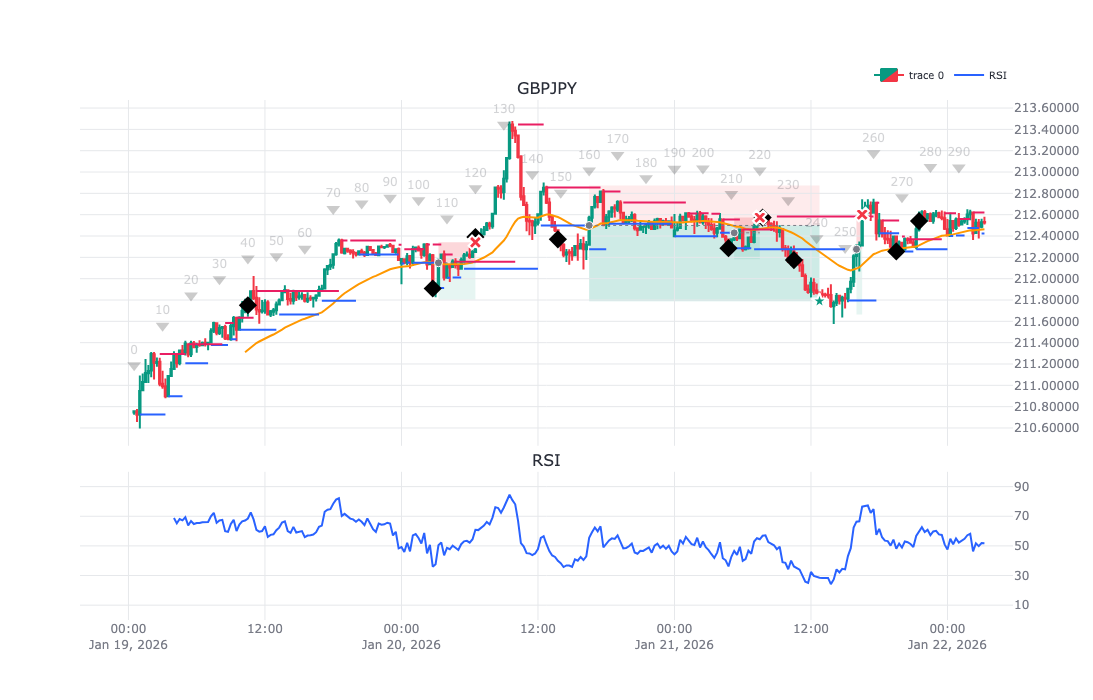

In [1]:
import sys
import os
from datetime import datetime
from dotenv import load_dotenv
original_stdout = sys.stdout
original_stderr = sys.stderr
# sys.stdout = open(os.devnull, 'w')
# sys.stderr = open(os.devnull, 'w')
dotenv_path = os.path.abspath(os.path.join("..", ".env"))
load_dotenv(dotenv_path)

os.environ['ZONE_INVERSION_MARGIN_MICROPIPS'] = '110'  # Zones Tuning
os.environ['BREAKOUT_MIN_STRENGTH_MICROPIPS'] = '100'  # Breakout Tuning
os.environ['MIN_RISK_DISTANCE_MICROPIPS'] = '0.001'

notebook_dir = os.getcwd()
if os.path.basename(notebook_dir) == "notebooks":
    parent_dir = os.path.abspath("..")
    if parent_dir not in sys.path:
        sys.path.insert(0, parent_dir)
from src.utils.config import Config
from src.models.timeframe import Timeframe
from src.utils.plot import plotly_plot
from main import backtesting

Config.show_debug_logs = True
# Tuning
# Config.zone_inversion_margin_micropips = 0 # Zones Tuning
# Config.breakout_min_strength_micropips = 100 # Breakout Tuning: We to break at least X amount of micropips in order to consider a breakout as valid
# Config.min_risk_distance_micropips = 0 


max_candles = 300
symbols = ['GBPJPY']
timeframe = Timeframe.M15
start_date = datetime(2025, 12, 1, 13, 10, 0)
end_date = datetime.now()

res = backtesting(
        symbols=symbols,
        timeframe=timeframe,
        start_date=start_date,
        end_date=end_date,
        max_candles=max_candles)

for symbol_index, (symbol, pair_data) in enumerate(res['data'].items()):
    plotly_plot(res['cerebro'], pair_data, symbol, symbol_index=symbol_index, height=700)